# 1. Introduccion

### Finanzas Cuantitativas y Ciencia de Datos
#### Rodrigo Lugo Frias y León Berdichevsky Acosta
#### ITAM Primavera 2019


Jugando con este notebook pueden familiarizarse un poco con python y su uso para Ciencia de Datos.

---

_INSTRUCCIONES:_
* Todas las celdas se corren haciendo __Shift + Enter__ o __Ctrl + Enter__

_NOTAS:_
* _Notebook adaptado de distintas fuentes y proyectos_

Primero importamos las librerias que vamos a utilizar 

In [9]:
%matplotlib inline

# Librerias importantes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import datetime as dt

#Silence all warnings
import warnings
warnings.filterwarnings('ignore')

* Leemos una base de datos (archivo .csv)

In [2]:
data = pd.read_csv("Data/GAPB MM Equity.csv")

* Informacion general de la base de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
Date      3232 non-null int64
Open      3232 non-null float64
High      3232 non-null float64
Low       3232 non-null float64
Last      3232 non-null float64
Volume    3232 non-null int64
PE        3019 non-null float64
dtypes: float64(5), int64(2)
memory usage: 176.8 KB


Notemos que los elementos de la columna 'Date' es de tipo int

In [4]:
type(data.Date[0])

numpy.int64

Cambiemos formato int a datetime

In [5]:
new_date  = pd.to_datetime(data.Date, format='%Y%m%d')
data.Date = new_date
type(data.Date[0])

pandas._libs.tslib.Timestamp

## Informacion estadistica de la base de datos

In [ ]:
data.describe()

* Convertimos la columna de fechas al indice

In [ ]:
data.index = data.Date
data.tail()

* Graficamos el desempeño anual de GAP

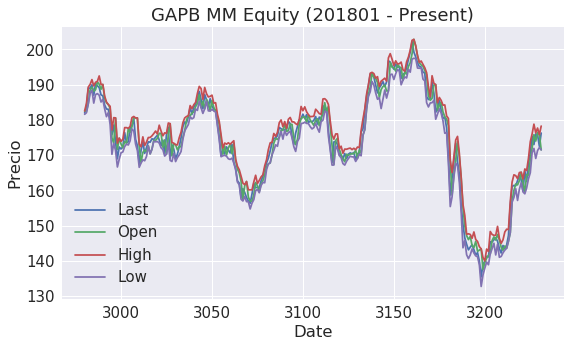

In [6]:
fig, ax = plt.subplots()
data[['Last','Open','High','Low']].tail(252).plot(figsize = (9,5), ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Precio')
ax.set_title('GAPB MM Equity (201801 - Present)')
plt.show()

* Leemos una base de datos de Quandl

In [4]:
import sys

with open("quandl-key.txt", 'r') as quandlfile:
    quandlkey = quandlfile.read()

In [5]:
import quandl
#######################################
#-------------------------------------#
# Get data from quandl                #
#-------------------------------------#
#######################################
token = quandlkey
strt  = "2018-01-17"
endd  = "2019-01-17" 
stocks = ["EOD/AAPL"]
data   = quandl.get(stocks, authtoken=token, start_date=strt, end_date=endd)
data.columns.tolist()
adj_close = [s for s in data.columns.tolist() if "Adj_Close" in s]

In [6]:
data.columns

Index(['EOD/AAPL - Open', 'EOD/AAPL - High', 'EOD/AAPL - Low',
       'EOD/AAPL - Close', 'EOD/AAPL - Volume', 'EOD/AAPL - Dividend',
       'EOD/AAPL - Split', 'EOD/AAPL - Adj_Open', 'EOD/AAPL - Adj_High',
       'EOD/AAPL - Adj_Low', 'EOD/AAPL - Adj_Close', 'EOD/AAPL - Adj_Volume'],
      dtype='object')

In [7]:
new_columns = [i.replace('EOD/AAPL - ','') for i in data.columns]
data.columns = new_columns
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

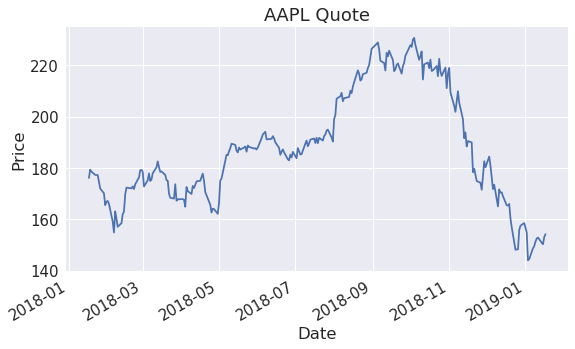

In [10]:
fig, ax = plt.subplots()
data['Open'].plot(figsize = (9,5), ax = ax)
ax.set_title('AAPL Quote')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

In [ ]:
data